# *Aufgabe: Advanced Metriken and Hypereparameteroptimierung*

In [1]:
# imports
import os
import numpy as np
import pandas as pd # zum Beispiel für die Datensätze

# oder Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelle: zum Beispiel RandomForest or kNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metriken
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


### Aufgabe 1. Advanced Metrics


Für den Census Datensatz trainieren Sie zwei Klassifizierungsmodelle Ihrer Wahl und berechnen Sie für sie neben der Akkuranz auch Precision und Recall. Plotten Sie mithilfe von sklearn zusätzlich je einen ROC-Graphen.


In [2]:
# Laden des bekannten Datensatzes
census = pd.read_csv(os.path.join("..", "..", "..", "data", "census.csv"))

# Vorbereitung wie in den vorherigen Notebooks

2. Train the Classifiers

In [3]:
# Trainieren der verschiedenen Classifier und berechnen der Metriken

# Berechne die true-positiv, false-positiv, true-negativ, false-negativ
# false-positiv, false-negativ, true-positiv werden für die weiteren Berechnungen benötigt

# Erstellen der ROC Kurve basierend auf anderen Metriken
# roc_kurve Dokumentation nachleses

# Darstellung aller Kurven in einem Diagramm um sie besser vergleichen zu können

### Aufgabe 2. Hyperparameteroptimierung

Optimieren Sie eins von den beiden Modelle mithilfe von wahlweise Grid- oder Random-Search aus der sklearn Implementierung. Um wieviel verbessert sich Ihr Modell im Rahmen dieser Optimierung?

In [5]:
# Festlegen des Wertebereichs der Hyperparameter
# Im Falle der Grid Serach auch die Schrittweite, sonst Abbruchkriterium

# Berechne die Metriken für die verschiedenen Möglichkeiten der Hyperparameter

# Speicher die besten Hyperparamter ab

ROC Graph für das verbesserte Model

Accuracy: 0.8070261638619334
Confusion matrix: 
[[5888 1292]
 [ 279  682]]
Precision: 0.3454913880445795
Recall: 0.7096774193548387


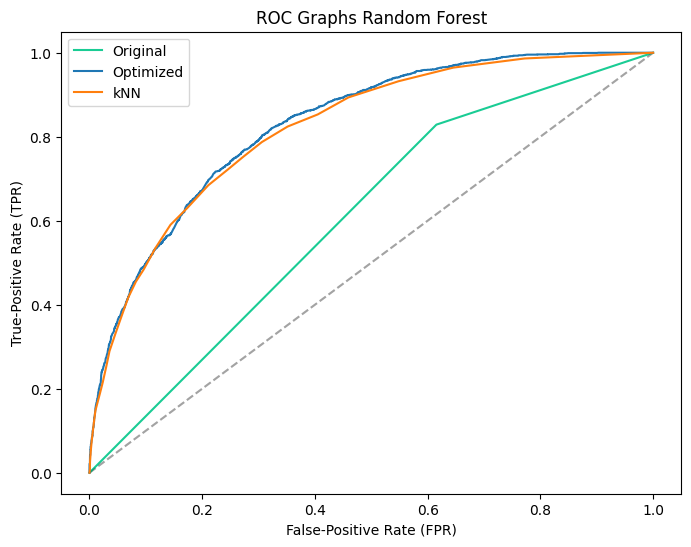

In [ ]:
# Erstellen einer ROC Kurve mit dem Originalen Modell aus Aufgabe 1

# Füge eine Kurve für das optimierte Modell hinzu

Accuracy: 0.8070261638619334
Confusion matrix: 
[[5888 1292]
 [ 279  682]]
Precision: 0.3454913880445795
Recall: 0.7096774193548387


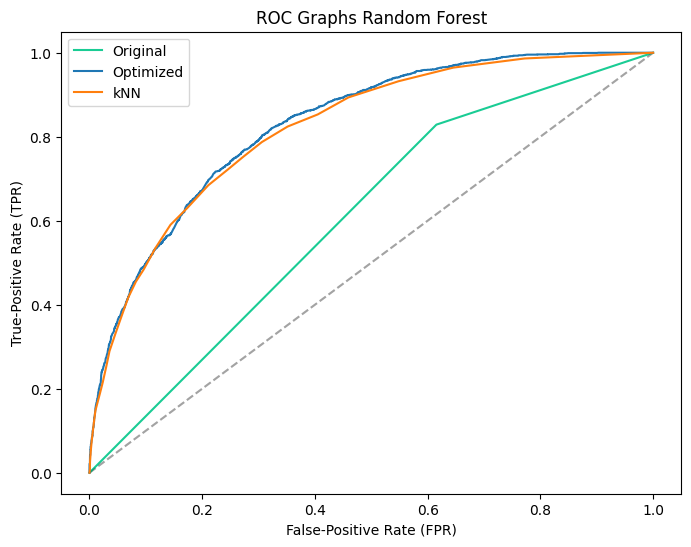

In [ ]:
# Originale Modell
rf1 = RandomForestClassifier(n_estimators=2, criterion="entropy", max_depth=1, min_samples_split=5, random_state=1)
rf1.fit(x_train, y_train)

plt.figure(figsize=(8,6))
plt.title("ROC Graphs Random Forest")
fpr, tpr, thresholds = metrics.roc_curve(y_test.values, rf1.predict_proba(x_test)[:,1:])
plt.plot([0,1],[0,1],ls="--",c="black",alpha=0.2)
plt.plot(fpr,tpr,label="Original",c="#1ACC94")
plt.xlabel("False-Positive Rate (FPR)")
plt.ylabel("True-Positive Rate (TPR)")

# Optimiertes Modell
best_point = (n_estimators, max_depth, min_samples_split)
rf_opt = RandomForestClassifier(n_estimators=best_point[0], criterion="entropy", max_depth=best_point[1],
                                min_samples_split=best_point[2], random_state=1)
rf_opt.fit(x_train, y_train)
predict = rf_opt.predict(x_test)

cm = confusion_matrix(predict, y_test)
tn, fp, fn, tp = cm.ravel()

print("Accuracy: {}".format(accuracy_score(predict, y_test)))
print("Confusion matrix: \n{}".format(cm))
print("Precision: {}".format(tp/(tp + fp)))
print("Recall: {}".format(tp/(tp + fn)))
fpr, tpr, _ = metrics.roc_curve(y_test.values, rf_opt.predict_proba(x_test)[:,1:])
plt.plot(fpr,tpr,label="Optimized")

fpr, tpr, _ = metrics.roc_curve(y_test.values, knn.predict_proba(x_test)[:,1:])
plt.plot([0,1],[0,1],ls="--",c="black",alpha=0.2)
plt.plot(fpr,tpr,label="kNN")
plt.legend()
plt.show()